<a href="https://colab.research.google.com/github/chetanbkcbk/ml-repo/blob/main/1stMLLinearRegressionPractice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
print("om namo narayana ,Om namah shivaya")

om namo narayana ,Om namah shivaya


In [ ]:
# Importing the libraries
import numpy as np
import io
import matplotlib.pyplot as plt
import pandas as pd
from google.colab import files#to use a file in my local system here ,import this lib
%matplotlib inline

In [ ]:
uploaded=files.upload()  #and then invoke this function

Saving 1000_Companies.csv to 1000_Companies.csv


In [ ]:
# Importing the dataset and Extracting the Independent and Dependent variables
companies = pd.read_csv(io.BytesIO(uploaded['1000_Companies.csv']))##to use a file in my local system here ,import this lib and after invoking the fnction
X = companies.iloc[:, :-1].values
y = companies.iloc[:, 4].values

In [ ]:
companies.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


<Axes: >

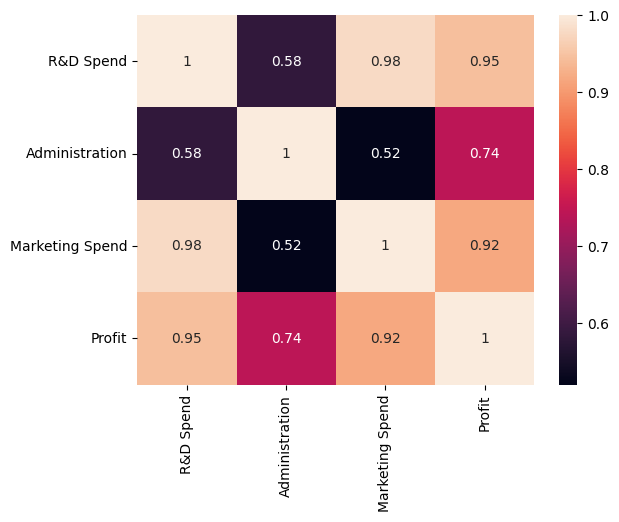

In [ ]:
#For  Data Visualisation
# and Building the Correlation matrix ,we need all numeric value columns,we need to neglect state column
import seaborn as sns

# Assuming 'State' is the column name to exclude:becoz only numeric value columns can be involved in correlation matrix
companies_numeric = companies.drop(columns=['State'])

# Calculate the correlation matrix and plot the heatmap
sns.heatmap(companies_numeric.corr(), annot=True)

Explanation of Changes:

Drop 'State' column: The line companies_numeric = companies.drop(columns=['State']) creates a new DataFrame companies_numeric by removing the 'State' column from the original companies DataFrame.
Calculate and plot: The rest of the code remains the same, calculating the correlation matrix using companies_numeric.corr() and plotting the heatmap with sns.heatmap().
Why this works:

By dropping the 'State' column, we ensure that only numerical columns are included when calculating the correlation matrix. This avoids the error caused by trying to convert the string values in the 'State' column to numbers.

This approach is often more concise and efficient than converting individual columns to numeric, especially if you only have a few non-numeric columns to exclude.

In [ ]:
# Encoding categorical data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

labelencoder = LabelEncoder()
X[:, 3] = labelencoder.fit_transform(X[:, 3])

# Create a OneHotEncoder instance with the 'handle_unknown' parameter for newer versions
onehotencoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore') #sparse=False for dense output, handle_unknown='ignore' to avoid errors with unseen values during prediction

# Fit and transform the specified column of X using the encoder
# Reshape the column to a 2D array before fitting
X_encoded = onehotencoder.fit_transform(X[:, 3].reshape(-1, 1))

# Get the feature names after one-hot encoding
feature_names = onehotencoder.get_feature_names_out(['State'])  # Assuming the column name is 'State'


# Concatenate the encoded features with the rest of the data
X = np.concatenate([np.delete(X, 3, axis=1), X_encoded], axis=1)

In summary:

We get the original index of the 'State' column from the companies DataFrame.
We pass that index (state_column_index) to the ColumnTransformer.
We retrieve all the transformed column names using ct.get_feature_names_out().
We isolate the encoded names (likely prefixed with 'encoder__') for your own use.

In [ ]:
# Avoiding the Dummy Variable Trap and is generally a good practice to use this after using Column Transformer
X = X[:, 1:]

Okay, let's discuss why you might need to avoid the Dummy Variable Trap and how X = X[:, 1:] helps in doing so.

What is the Dummy Variable Trap?

The Dummy Variable Trap occurs when you use one-hot encoding to represent categorical variables and include all the dummy variables (one for each category) in your model along with an intercept term (a constant in the regression equation). This creates a situation of perfect multicollinearity because the sum of all the dummy variables for a particular observation will always be 1. This multicollinearity can lead to issues in model estimation and interpretation.

How X = X[:, 1:] helps:

The line X = X[:, 1:] is commonly used to drop one of the dummy variables created during one-hot encoding. By removing one column, you avoid the Dummy Variable Trap. Here's how it works:

X[:, 1:]: This slicing operation selects all rows (: before the comma) and all columns starting from the second column (index 1) to the end (1: after the comma).
Dropping the first column: Effectively, this code drops the first column of the X array (which likely represents one of the categories of your original categorical variable).
Why drop one column?

By dropping one of the dummy variables, you make the remaining dummy variables relative to the dropped one. For example, if you have a categorical variable 'Color' with categories 'Red', 'Green', and 'Blue', and you drop the 'Red' dummy variable, the remaining 'Green' and 'Blue' dummy variables will indicate the presence or absence of 'Green' and 'Blue' relative to 'Red'.

Example:


Original Data:
Color
Red
Green
Blue
Red

One-Hot Encoding (with trap):
Red Green Blue
1    0    0
0    1    0
0    0    1
1    0    0

One-Hot Encoding (after dropping 'Red' to avoid trap):
Green Blue
0    0
1    0
0    1
0    0

but in my case is it necessary????????

In your case:

You are using OneHotEncoder to encode the 'State' column, indicating a categorical variable.
If you plan to use a regression model, you should apply X = X[:, 1:] (or a similar method) to drop one of the encoded columns for 'State' after the ColumnTransformer step.
If you're using a tree-based model or another algorithm less sensitive to multicollinearity, you may choose to keep all dummy variables or drop one for consistency and interpretability.
Recommendation:

Considering the potential benefits of avoiding the Dummy Variable Trap and the relatively low cost of doing so, it's generally a good practice to apply X = X[:, 1:] after using ColumnTransformer with OneHotEncoder, especially if you're unsure about the exact algorithm you'll use for prediction

In [ ]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
# Fitting Multiple Linear Regression(ie,many input variables) to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)
y_pred

array([ 92043.77481079,  90728.58905936,  96966.82368766, 172922.57882197,
        84732.53939853, 110929.48299297, 173476.5066252 ,  93666.85798883,
       163038.64784422,  54807.47868534,  70013.37930294, 148698.82765189,
       127851.75467721,  62671.01770442, 176655.98770543,  76924.19316894,
       117526.69119826, 164175.38009063, 131025.76869224, 179891.06858246,
        59816.61099548,  88069.2487918 , 178045.9266115 ,  86598.45894519,
       106719.39349114, 103080.9061119 ,  22791.14402973,  59143.11392805,
        71890.5606935 , 214221.56669418, 119967.52363128, 113200.13876604,
       102167.64782421, 136538.53270985,  67138.84183593, 110434.85525919,
       183696.7475799 , 168834.66044174, 171922.73970488, 116970.48932064,
        97579.80990688, 165022.0981532 , 109341.48810605,  51886.59106616,
       115853.94712144,  61990.66360559, 156270.45699639,  79228.21804293,
       157535.15412593, 129959.29336049, 181796.15099155, 171888.8047731 ,
        95858.55833351,  

In [ ]:
# Calculating the Coefficients
print(regressor.coef_)

[ 4.28960983e-01 -9.56015688e+02  2.66822536e+01 -9.29333434e+02
  9.29333434e+02]


Okay, let's discuss the meaning of coefficients in your context.

Coefficients in Linear Regression:

In the context of your code where you're using LinearRegression, the regressor.coef_ attribute provides the coefficients of the linear regression model. These coefficients represent the estimated effect of each independent variable (feature) on the dependent variable (target).

Interpretation:

Magnitude: The magnitude of a coefficient indicates the strength of the relationship between that feature and the target. A larger absolute value suggests a stronger influence.
Sign: The sign of a coefficient (positive or negative) indicates the direction of the relationship.
A positive coefficient means that an increase in the feature value is associated with an increase in the target value.
A negative coefficient means that an increase in the feature value is associated with a decrease in the target value.
Example:

Let's say your model has two features: 'R&D Spend' and 'Administration'. If the coefficient for 'R&D Spend' is 0.8 and the coefficient for 'Administration' is -0.2, this means:

For every unit increase in 'R&D Spend', the predicted target value increases by 0.8 units, assuming all other features remain constant.
For every unit increase in 'Administration', the predicted target value decreases by 0.2 units, assuming all other features remain constant.
In your code:

You're printing the coefficients using print(regressor.coef_). This will display an array of values, where each value corresponds to the coefficient of a feature in your model. The order of the coefficients in the array matches the order of features in your X matrix.

Interpreting your coefficients:

To correctly interpret your coefficients, you need to consider:

Feature scaling: If your features have different scales (e.g., one feature ranges from 0 to 100, while another ranges from 0 to 1), the coefficients will also be on different scales, making it difficult to compare their importance directly. Feature scaling techniques (like standardization or normalization) can help address this issue.
Categorical features: Since you've used OneHotEncoder to encode the 'State' column, you'll have multiple coefficients associated with the different categories of 'State'. These coefficients represent the effect of each category compared to the baseline (the category that was dropped to avoid the Dummy Variable Trap).
Model assumptions: Linear regression makes certain assumptions about the data (e.g., linearity, homoscedasticity, no multicollinearity). If these assumptions are violated, the interpretation of the coefficients can be less reliable.

In [ ]:
# Calculating the Intercept
print(regressor.intercept_)

22877.083526222326


value i got is 22877.083526222326

Okay, let's interpret the intercept value of 22877.083526222326 in your linear regression model.

Context

Remember that your model is predicting the 'Profit' of companies based on features like 'R&D Spend', 'Administration', 'Marketing Spend', and 'State'. You've used linear regression, and the intercept value you obtained is 22877.08.

Interpretation

In this context, the intercept of 22877.08 means that if a company has:

R&D Spend = 0
Administration = 0
Marketing Spend = 0
And belongs to the baseline 'State' category (the one you dropped during one-hot encoding to avoid the dummy variable trap)
...then the model predicts a profit of approximately 22877.08.

Practical Meaning

This intercept could represent a baseline profit that companies are expected to have even without any spending on R&D, administration, or marketing. It could be due to factors not included in the model, such as existing assets, brand recognition, or industry conditions.

Considerations

Realistic Scenario: Is it realistic for a company to have zero spending on all these features? If not, the intercept might not have a direct practical interpretation in real-world scenarios.
Feature Scaling: If you scaled your features, the intercept would be based on the scaled values, which could affect its interpretation.
Model Accuracy: The accuracy of the intercept and the model's predictions depends on the quality of your data and the model's fit to the data.
In Summary

The intercept value of 22877.08 suggests a baseline profit for companies in your dataset, even with zero spending on the considered features. However, its practical significance depends on the context of your data and the realistic scenarios for your problem.

I hope this interpretation helps you understand the meaning of the intercept value in your model. Feel free to ask any further questions you may have.

In [ ]:
# Calculating the R squared value
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.7257233440009054

Okay, let's discuss the R-squared value of 0.7257233440009054 that you obtained for your linear regression model.

What is R-squared?

R-squared (R²) is a statistical measure that indicates the proportion of the variance in the dependent variable (target) that is predictable from the independent variables (features) in your model. It's also known as the coefficient of determination.

Interpretation

Range: R-squared values range from 0 to 1.
Higher is better: A higher R-squared value generally indicates a better fit of the model to the data, meaning that the model is able to explain more of the variation in the target variable.
Percentage of variance explained: An R-squared value of 0.7257 means that approximately 72.57% of the variance in the 'Profit' (your target variable) can be explained by the features included in your linear regression model ('R&D Spend', 'Administration', 'Marketing Spend', and 'State').
In your case:

The R-squared value of 0.7257 suggests that your linear regression model is doing a reasonably good job of predicting 'Profit' based on the included features. About 72.57% of the variability in profit is explained by the model, while the remaining 27.43% is due to factors not captured by the model or random noise.

Important Considerations

Context: The interpretation of R-squared can depend on the specific context of your problem. In some fields, an R-squared of 0.7257 might be considered very good, while in others, it might be considered moderate.
Overfitting: A very high R-squared (close to 1) could indicate overfitting, where the model is too closely fitted to the training data and may not generalize well to new data.
Other metrics: R-squared is just one metric for evaluating model performance. It's important to consider other metrics (such as mean squared error, root mean squared error, or adjusted R-squared) to get a more complete picture of the model's quality.
Recommendation

While an R-squared of 0.7257 is a good starting point, it's essential to continue evaluating and refining your model, considering other metrics and the specific goals of your analysis. You might explore:

Feature engineering: Creating new features or transforming existing ones to improve the model's predictive power.
Model selection: Trying different types of models to see if they can achieve a better fit.
Regularization: Applying techniques like Ridge or Lasso regression to prevent overfitting and improve generalization.